# Лабораторная работа 1

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [223]:
df_train = pd.read_csv("./data/mitbih_train.csv", header=None)
df_train.info()
df_train.describe()
classes = df_train[187].unique()
print(classes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
[0. 1. 2. 3. 4.]


### Типы комплексов
0 — N: Нормальный комплекс (не эктопический);

1 — S: Суправентрикулярный эктопический комплекс;

2 — V: Желудочковый эктопический комплекс;

3 — F: Сливной комплекс;

4 — Q: Неизвестная форма.

### Настройка графиков

In [224]:
labels = ["N", "S", "V", "F", "Q"]
colors = ["#2563eb", "#dc2626", "#22c55e", "#4f46e5", "#fef9c3"]

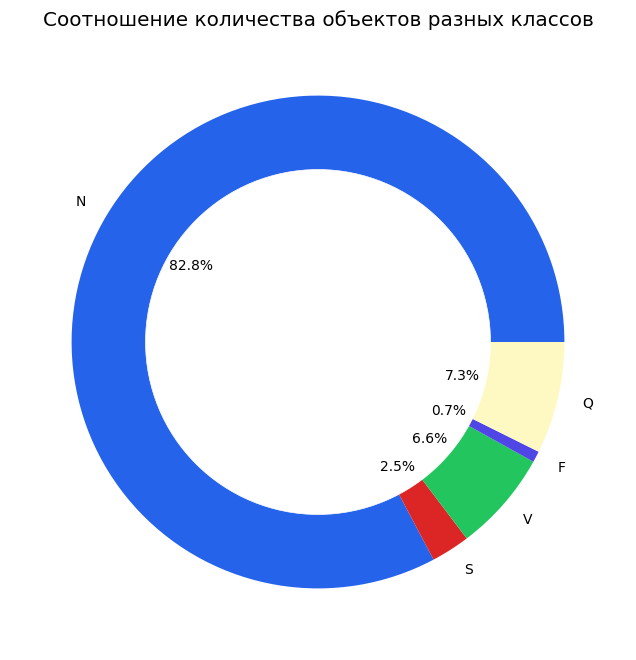

In [225]:
def pie_plot(_df):
    obj_by_class = _df[187].value_counts(sort=False)

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.grid(False)

    plt.pie(obj_by_class, labels=labels, autopct="%1.1f%%", colors=colors)
    my_circle = plt.Circle((0, 0), 0.7, color="#ffffff")
    plt.title("Cоотношение количества объектов разных классов")
    plt.gcf().gca().add_artist(my_circle)

    plt.show()


pie_plot(df_train)

### Графики, содержащие по одному (рандомному) объекту

> Сигналы соответствуют формам сердечных сокращений на электрокардиограмме (ЭКГ) в норме и при различных аритмиях и инфаркте миокарда. Эти сигналы предварительно обрабатываются и сегментируются, причем каждый сегмент соответствует сердцебиению.

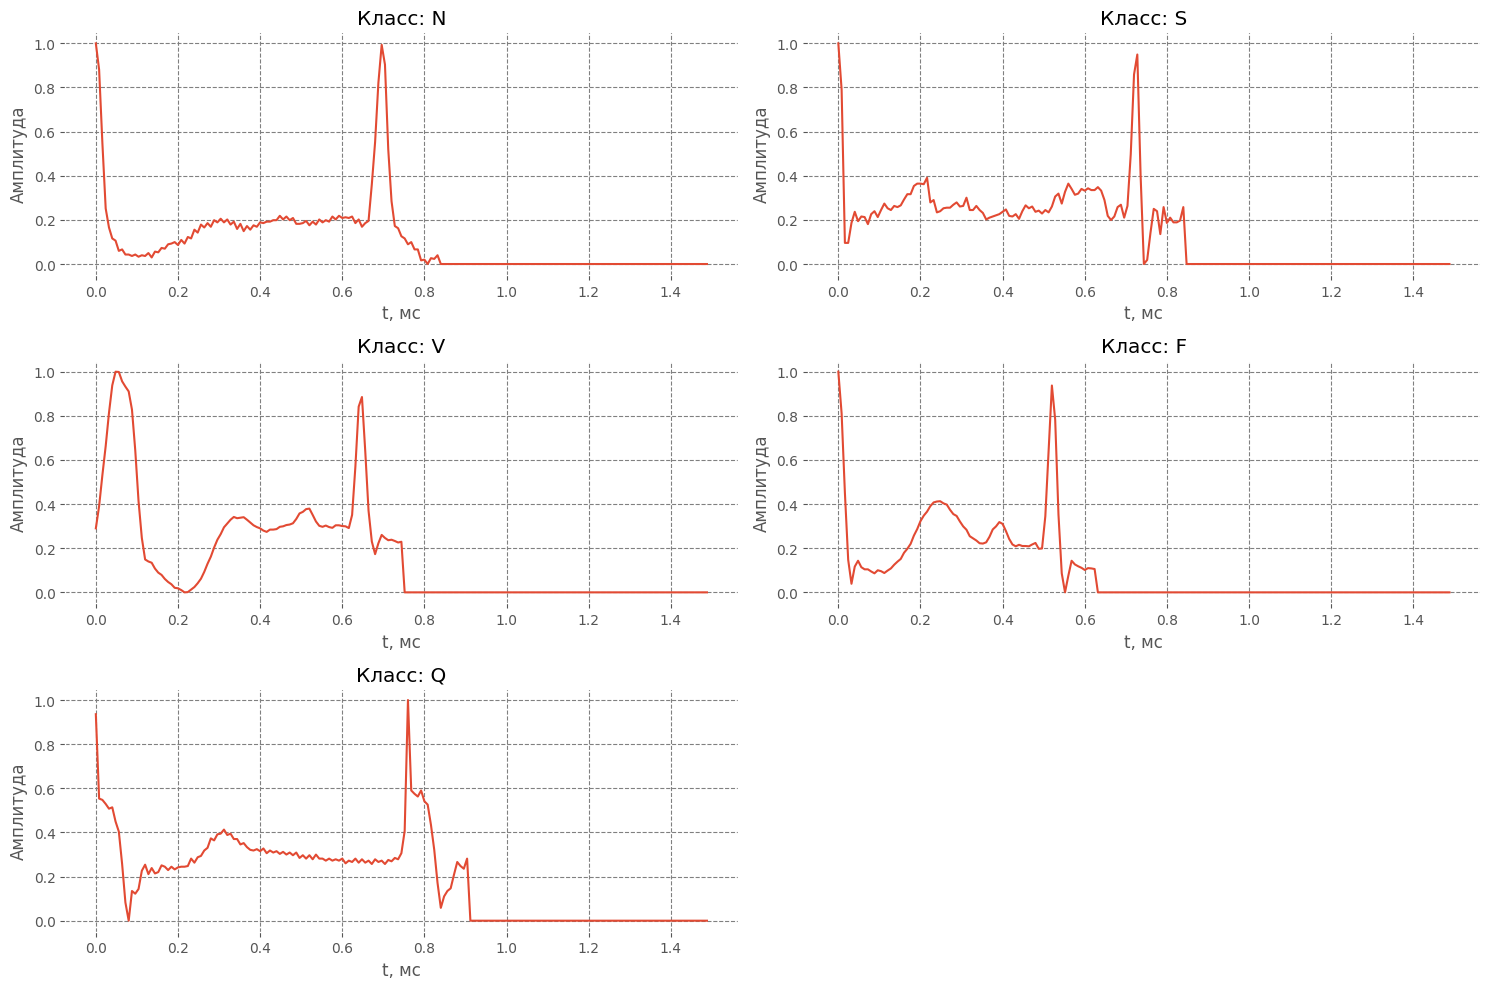

In [235]:
sampled_data = df_train.groupby(187, group_keys=False).apply(lambda df: df.sample(1))

x = np.arange(0, 187)*8/1000
plt.figure(figsize=(15, 10))

for i, (_, row) in enumerate(sampled_data.iterrows(), start=1):
    plt.rc('grid', linestyle="--", color='gray')
    plt.subplot(3, 2, i)
    plt.plot(x, row.values[:-1])
    plt.gca().set_facecolor("white")
    plt.title(f"Класс: {labels[int(row.values[-1])]}")
    plt.xlabel("t, мс")
    plt.ylabel("Амплитуда")

plt.tight_layout() 
plt.show()

### Построение отдельных графиков

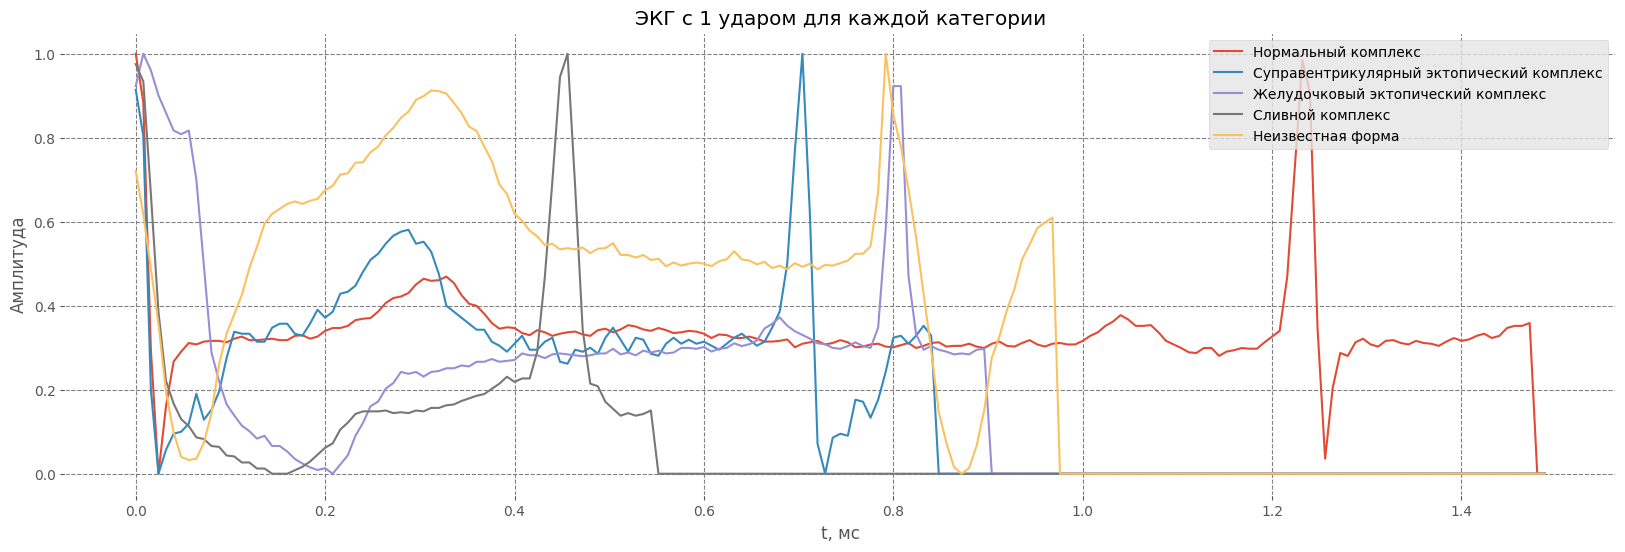

In [229]:
C0 = sampled_data.iloc[0, :187].values
C1 = sampled_data.iloc[1, :187].values
C2 = sampled_data.iloc[2, :187].values
C3 = sampled_data.iloc[3, :187].values
C4 = sampled_data.iloc[4, :187].values

plt.figure(figsize=(20, 6))
plt.gca().set_facecolor("white")
plt.plot(x, C0, label="Нормальный комплекс")
plt.plot(x, C1, label="Суправентрикулярный эктопический комплекс")
plt.plot(x, C2, label="Желудочковый эктопический комплекс")
plt.plot(x, C3, label="Сливной комплекс")
plt.plot(x, C4, label="Неизвестная форма")
plt.xlabel("t, мс")
plt.ylabel("Амплитуда")
plt.title("ЭКГ с 1 ударом для каждой категории")
plt.legend(loc='upper right')
plt.show()

### Выравнивание числа объектов в выборке

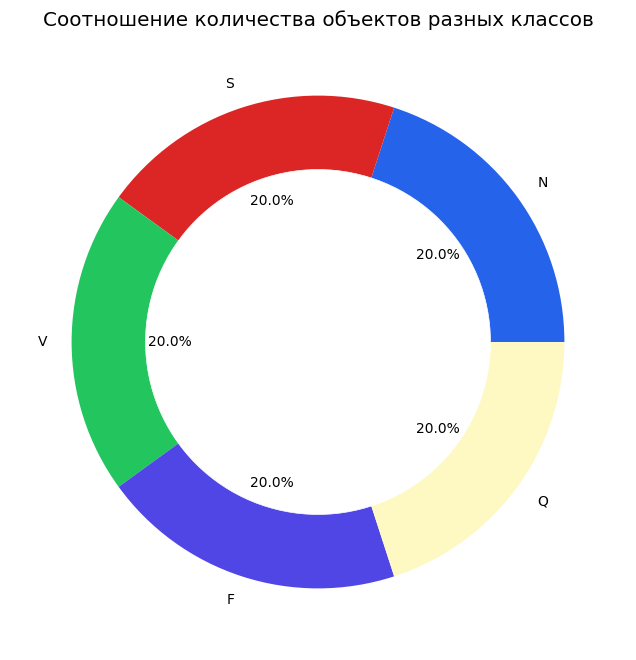

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
15795,0.778135,0.697749,0.411576,0.196141,0.096463,0.093248,0.067524,0.067524,0.045016,0.051447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.907563,1.000000,0.464286,0.046218,0.241597,0.336134,0.283613,0.283613,0.300420,0.300420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54886,0.971154,0.910256,0.548077,0.256410,0.121795,0.128205,0.080128,0.064103,0.028846,0.038462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6265,0.000000,0.060127,0.202532,0.306962,0.424051,0.471519,0.588608,0.664557,0.702532,0.715190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37194,1.000000,0.397129,0.191388,0.301435,0.196172,0.172249,0.129187,0.119617,0.129187,0.172249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85290,0.944805,0.880952,0.822511,0.766234,0.597403,0.559524,0.405844,0.312771,0.221861,0.165584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
84983,0.785032,0.670382,0.557325,0.420382,0.270701,0.136943,0.063694,0.001592,0.000000,0.017516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
81396,0.711214,0.605223,0.493088,0.384025,0.247312,0.139785,0.069124,0.033794,0.039939,0.075269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83136,0.945107,0.894988,0.832936,0.780430,0.713604,0.633652,0.531026,0.427208,0.328162,0.245823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [234]:
from sklearn.utils import resample


dfs: list[pd.DataFrame] = []

for i in range(5):
    resampled_df = resample(
        df_train[df_train[187] == i], 
        replace=True, 
        n_samples=2000,     
        random_state=42
    )
    dfs.append(resampled_df)

df_train_resampled = pd.concat([*dfs])
pie_plot(df_train_resampled)
df_train_resampled